# t-SNE(T-distributed Stochastic Neighbor Embedding)

1) Best technique especially for dimensionality reduction and Visualization. 
<br>2) Very easy to understand when we convert from from d-dimensions to d'-dimensions,for instance conversion from 784-D to    2-D.
<br>3)There are other famous techniques like MDS,Sammon mapping,graph based which are old like 2 decades but first paper for t-SNE was proposed in 2008. 
<br> 4) Both PCA and T-SNE used for dimenstionality redution and visulaization but the major difference between both of them is PCA tries to preserve global shape of data(Max spread/Variance of data) doesn't care about distance between data points.Where as,t-SNE preserves local structure meaning preserving  distance between points.
    

### Some important terminology for t-SNE:
#### Neighborhood:
For a point Xi in a d-dimension plot, neighborhood of Xi is nothing but all the points of Xj such that Xi and Xj are geometrically close to each other.
#### Embedding:
It's defined as, picking point from higher dimensions and placing it in lower dimension.<br>For example picking point Xi from d-dimenstions and finding new placing for point Xi in 2-dimension which is called as Xi'
<br>Geometrically speaking, After Embedding is done smaller distance between points are preseverd and longer distance are not preserved. They can be placed anywhere in plane.
#### Steps:
It's nothing but number of iterations performed by T-SNE program.
#### Perplexity:
Rougly or loosely number of neighbours to whom we want to preserver the distance. In other words, preserving distance between number of points around a specific point.

# t-SNE using Scikit-Learn on MNIST data set

In [3]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sn
d0 = pd.read_csv('./mnist_train.csv')
l = d0['label']
d = d0.drop("label",axis = 1)
labels = l.head(42000)
data = d.head(42000)

standardized_data = StandardScaler().fit_transform(data)
print(Standardized_data.shape)

(42000, 784)


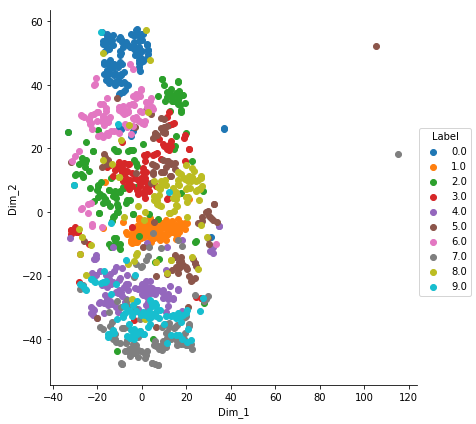

In [7]:
from sklearn.manifold import TSNE 
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

#number of components is 2 i.e., 2 dimensions
# random state helps us to give same output on execution of model multiple times.if we ignore it then there will be slight difference
# in output everytime we execute program because t-SNE is probabilistic algorithm  
model = TSNE(n_components = 2,random_state = 0)

#Default perplexity = 30
#Default step/number of iterations for the optimization = 1000
tsne_data = model.fit_transform(data_1000)

tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,columns=("Dim_1","Dim_2","Label"))
sn.FacetGrid(tsne_df,hue="Label",size = 6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

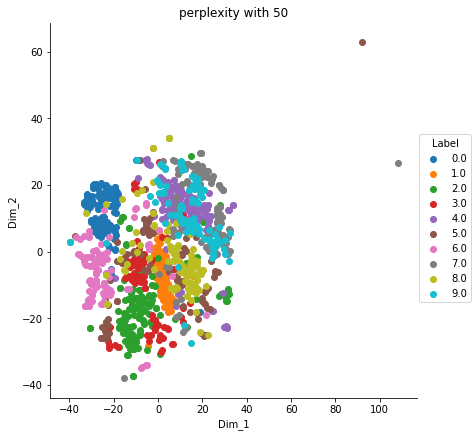

In [9]:
model = TSNE(n_components = 2,random_state = 0,perplexity = 50)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,columns = ("Dim_1","Dim_2","Label"))
sn.FacetGrid(tsne_df,hue="Label",size = 6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.title("perplexity with 50")
plt.show()

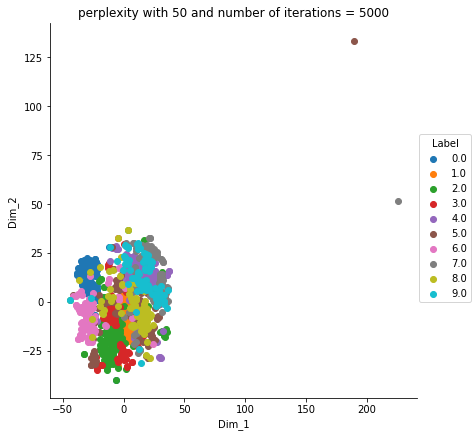

In [16]:
model = TSNE(n_components = 2,random_state = 0, perplexity = 50,n_iter=5000)
tnse_data = model.fit_transform(data_1000)
tnse_data = np.vstack((tnse_data.T,labels_1000)).T
tnse_df = pd.DataFrame(data=tnse_data,columns=("Dim_1","Dim_2","Label"))
sn.FacetGrid(tnse_df,hue="Label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.title("perplexity with 50 and number of iterations = 5000")
plt.show()

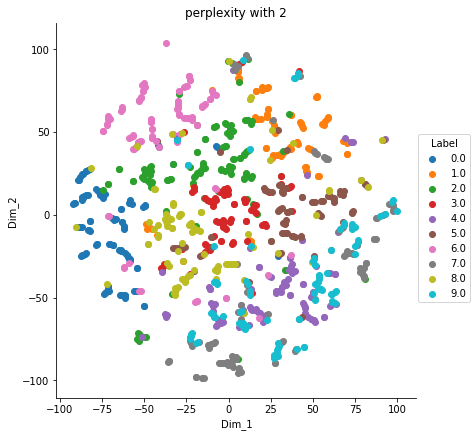

In [15]:
model = TSNE(n_components = 2,random_state =0, perplexity = 2)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,columns = ("Dim_1","Dim_2","Label"))
sn.FacetGrid(tsne_df,hue="Label",size = 6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.title("perplexity with 2")
plt.show()

# Observations
1) Always change the number of iterations and preplexity till the shape of the plot is stable.
<br> 2) t-SNE basically expands the dense clusters and shrinks sparse clusters such that both clusters will have same density, meaning t_SNE cannot define anything about clusters and it's a draw back.
<br>3) t-SNE doesn't preserve the distance between clusters.
<br>4) Never make conculsions based on junk data, make sure to change preplexity and see the difference in plot.
<br>5) t-SNE will group points based on visual similarity.
<br>6) t-SNE cannot interrput cluster sizes or inter cluster distances.
<br>7) t-SNE has Crowding problem meaning some times it is impossible to preserver distance between neighbourhoods.

#  References:
1) Applied AI
<br> 2) https://distill.pub/2016/misread-tsne/
<br>3) http://colah.github.io/posts/2014-10-Visualizing-MNIST/
